<a href="https://colab.research.google.com/github/Emirhan-Denizyol/Amazon_Review_Sentimental_Analysis_ML/blob/main/Sentiment_Analysis_for_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import numpy as np

In [ ]:
def load_dataset():
    return pd.read_excel('/content/amazon.xlsx')

In [ ]:
df = load_dataset()
df

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...
...,...,...,...,...
5606,4,0,Recommend,Great product for reasonable money. Delivered...
5607,5,0,"Terrible , different colors. I returned",Color is way off and panels do not match
5608,5,0,Extremely pleasing,These are great for my studio as they compleme...
5609,5,0,Perfect,Brought out the beauty in kids room. They love...


In [ ]:
df.Star.value_counts()

5    4126
4     588
1     368
3     315
2     214
Name: Star, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [ ]:
# Convert all letters to lowercase.
df.Review = df.Review.str.lower()

In [ ]:
# Remove punctuation marks.
df.Review = df.Review.str.replace('[^\w\s]', '', regex=True)

In [ ]:
# To control the transaction I have made
contains_punctuation = df.Review.str.contains('[^\w\s]', regex=True)
print(contains_punctuation.any())

False


In [ ]:
# Remove numerical expressions in the comments.
df.Review = df.Review.str.replace('[\d]', '', regex=True)

In [ ]:
# To control the transaction I have made
contains_numbers = df.Review.str.contains('\d', regex=True)
print(contains_numbers.any())

"""
Another way to check numeric values

is_numeric = pd.to_numeric(df['Review'], errors='coerce').notnull().all()
print(is_numeric)

"""

False


"\nAnother way to check numeric values\n\nis_numeric = pd.to_numeric(df['Review'], errors='coerce').notnull().all()\nprint(is_numeric)\n\n"

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove words that do not contain information (stopwords) from the data.
sw = stopwords.words('english')

df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [ ]:
# To control the transaction I have made
contains_stopwords = df['Review'].apply(lambda x: any(word.lower() in sw for word in x.split()))

# Show lines containing stopwords
rows_with_stopwords = df[contains_stopwords]
print(rows_with_stopwords)

Empty DataFrame
Columns: [Star, HelpFul, Title, Review]
Index: []


In [ ]:
# Remove words that occur less than 1000 times from the data.

pd.Series(df.Review).value_counts()

love                                                                           93
beautiful                                                                      61
nice                                                                           29
good                                                                           21
love curtains                                                                  19
                                                                               ..
pretty also thin                                                                1
love curtains make smile loud every time walk kitchen item met expectations     1
really beautiful didnt work grdgrls bunkbed fort fabric thick                   1
daughter hung sliding glass door look great                                     1
cute curtains sons room thick enough keep light                                 1
Name: Review, Length: 5098, dtype: int64

In [ ]:
temp_df = pd.Series(' '.join(df['Review']).split()).value_counts()
print(temp_df)

curtains        1891
love            1312
room            1116
like            1037
beautiful        943
                ... 
neato              1
decormatches       1
thx                1
pricebrid          1
studioliving       1
Length: 6699, dtype: int64


In [ ]:
drops = temp_df[temp_df < 2]

In [ ]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in drops))

In [ ]:
mask = df['Review'].apply(lambda x: any(word in drops.index for word in str(x).split()))

# Filter rows in df using mask
rows_with_drops = df[mask]

# Check if there is an element belonging to drops in the df.
if not rows_with_drops.empty:
    print("df içinde drops'a ait bir eleman bulundu.")
    print(rows_with_drops)
else:
    print("df içinde drops'a ait bir eleman bulunamadı.")

df içinde drops'a ait bir eleman bulunamadı.


In [ ]:
# Lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['Review'] = df['Review'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
df['Review']

0                                                   happy
1                     good quality material however panel
2       product fun bedroom windowsbr imagery bit stre...
3                                 lo que e que un poco ma
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio complement entire theme area phot...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [ ]:
tf = df['Review'].apply(lambda x: pd.value_counts(x.split(' '))).sum(axis=0).reset_index()

In [ ]:
tf.columns = ['words', 'tf']
tf

,words,tf
0,happy,196.0
1,good,535.0
2,quality,889.0
3,material,565.0
4,however,78.0
...,...,...
2723,oval,2.0
2724,bistro,2.0
2725,balance,2.0
2726,patchwork,2.0


In [ ]:
tf.sort_values(by="tf", ascending=False).reset_index()

,index,words,tf
0,58,curtain,2588.0
1,35,look,1531.0
2,108,love,1453.0
3,92,room,1129.0
4,152,like,1053.0
...,...,...,...
2723,1941,nail,2.0
2724,1942,salon,2.0
2725,1945,write,2.0
2726,1948,colorsbr,2.0


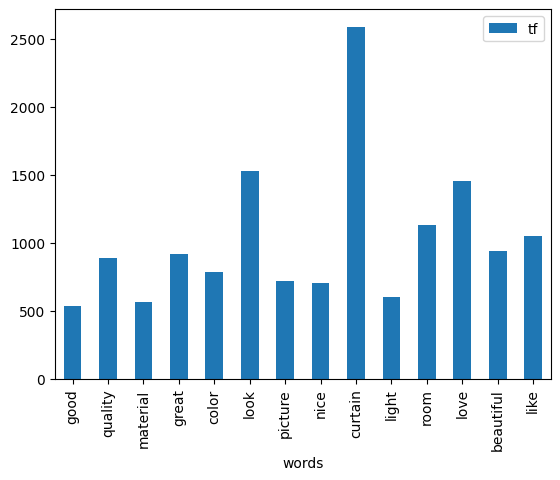

In [ ]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

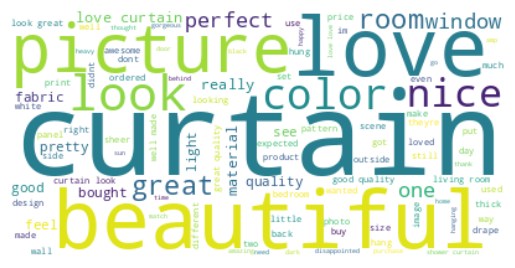

In [ ]:
text = ' '.join(i for i in df.Review)

wordcloud = WordCloud(max_font_size = 100,
                      max_words = 100,
                      background_color = 'white').generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)['compound'])

df['sentiment_label'] = df['Review'].apply(lambda x: 'pos' if sia.polarity_scores(x)['compound'] > 0 else 'neg')

df['sentiment_label'] = LabelEncoder().fit_transform(df['sentiment_label'])

In [ ]:
df.head()

,Star,HelpFul,Title,Review,polarity_score,sentiment_label
0,5,0,looks great,happy,0.5719,1
1,5,0,Pattern did not align between the two panels.,good quality material however panel,0.4404,1
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windowsbr imagery bit stre...,0.7184,1
3,5,0,Que se ven elegantes muy finas,lo que e que un poco ma,0.0000,0
4,5,0,Wow great purchase,great bang buck cant believe quality material ...,0.9042,1


In [ ]:
df.groupby('sentiment_label')['Star'].mean()

sentiment_label
0    3.409681
1    4.583333
Name: Star, dtype: float64

In [ ]:
X = df.Review

y = df.sentiment_label

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [ ]:
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_X)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_X)

x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_X)

In [ ]:
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)

In [ ]:
y_pred = log_model.predict(x_test_tf_idf_word)

In [ ]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.36      0.92      0.52        88
           1       0.99      0.89      0.94      1315

    accuracy                           0.89      1403
   macro avg       0.68      0.91      0.73      1403
weighted avg       0.95      0.89      0.91      1403



In [ ]:
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

0.8546009150991358

In [ ]:
rf = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)

In [ ]:
cross_val_score(rf, x_test_tf_idf_word, test_y, cv=5).mean()

0.8959405185561768

In [ ]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv = 3, scoring='accuracy').fit(x_train_tf_idf_word, train_y)

In [ ]:
rf_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_final = RandomForestClassifier(**rf_grid.best_params_, random_state=42).fit(x_train_tf_idf_word, train_y)

In [ ]:
cross_val_score(rf_final, x_test_tf_idf_word, test_y, cv=5).mean()

0.8952338586680224

In [ ]:
# RandomizedSearchCV

rf_random_svc = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=100, cv=5, scoring = 'accuracy', n_jobs=-1).fit(x_train_tf_idf_word, train_y)

In [ ]:
rf_random_svc.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
rf_final_randomized = RandomForestClassifier(**rf_random_svc.best_params_, random_state = 42).fit(x_train_tf_idf_word, train_y)

In [ ]:
cross_val_score(rf_final_randomized, x_test_tf_idf_word, test_y, cv=5).mean()

0.8938103711235383

In [ ]:
lgbm_model = LGBMClassifier().fit(x_train_tf_idf_word, train_y)

[LightGBM] [Info] Number of positive: 3585, number of negative: 623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11614
[LightGBM] [Info] Number of data points in the train set: 4208, number of used features: 424
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.851949 -> initscore=1.749967
[LightGBM] [Info] Start training from score 1.749967


In [ ]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
lgbm_params = {'learning_rate': [0.1, 0.01, 0.001],
               'n_estimators': [100, 300, 500, 1000],
               'num_leaves': [15, 25, 31, 40],
               'random_state': np.random.randint(5, 100, 30),
               'colsample_bytree': [0.5, 0.7, 1]}

lgbm_model_randomized = RandomizedSearchCV(estimator=lgbm_model, param_distributions=lgbm_params, n_iter=100, cv=5, scoring = 'accuracy', n_jobs=-1).fit(x_train_tf_idf_word, train_y)

[LightGBM] [Info] Number of positive: 3585, number of negative: 623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11614
[LightGBM] [Info] Number of data points in the train set: 4208, number of used features: 424
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.851949 -> initscore=1.749967
[LightGBM] [Info] Start training from score 1.749967


In [ ]:
lgbm_model_randomized.best_params_

{'random_state': 7,
 'num_leaves': 15,
 'n_estimators': 100,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [ ]:
lgbm_model.final = LGBMClassifier(**lgbm_model_randomized.best_params_).fit(x_train_tf_idf_word, train_y)

[LightGBM] [Info] Number of positive: 3585, number of negative: 623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11614
[LightGBM] [Info] Number of data points in the train set: 4208, number of used features: 424
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.851949 -> initscore=1.749967
[LightGBM] [Info] Start training from score 1.749967


In [ ]:
cross_val_score(lgbm_model, x_test_tf_idf_word, test_y, cv=5).mean()

[LightGBM] [Info] Number of positive: 943, number of negative: 179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2227
[LightGBM] [Info] Number of data points in the train set: 1122, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.840463 -> initscore=1.661680
[LightGBM] [Info] Start training from score 1.661680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

0.8795399084900865

In [ ]:
"""
Accuracy Score:

RandomForestClassifier: 0.8959532282663956
LogisticRegression: 0.8546009150991358
LGBMClassifier: 0.8795399084900865
"""

'\nAccuracy Score:\n\nRandomForestClassifier: 0.8959532282663956\nLogisticRegression: 0.8546009150991358\nLGBMClassifier: 0.8795399084900865\n'